In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/loandata.csv')
df.head()

In [ ]:
print(df.shape)

In [ ]:
print(df.describe(include='all'))

In [ ]:
# Calculate missing values for each column
missing_values = df.isnull().sum()

# Menampilkan kolom yang memiliki nilai hilang
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

In [ ]:
# Mengecek apakah ada NaN dalam DataFrame
has_nan = df.isna().any().any()
print("Apakah terdapat nilai NaN dalam data?:", has_nan)

if has_nan:
    total_nan_per_column = df.isna().sum()
    columns_with_nan = total_nan_per_column[total_nan_per_column > 0]
    print("\nKolom dengan nilai NaN:\n", columns_with_nan)
else:
    print("\nTidak ada nilai NaN dalam dataset.")

In [ ]:
# Menampilkan jumlah nilai 0 di setiap kolom yang mengandung nilai 0
zero_counts = (df[columns_with_nan.index] == 0).sum() # Use .index to get column names

# Menampilkan jumlah nilai 0 per kolom
print("Jumlah nilai 0 per kolom:")
print(zero_counts)

In [ ]:
print(df.info())

In [ ]:
cols_to_drop = [
    'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
    'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
    'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
    'inq_last_12m', 'Unnamed: 0', 'id', 'member_id', 'emp_title',
    'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
    'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
    'mths_since_last_record', 'pub_rec', 'collections_12_mths_ex_med',
    'mths_since_last_major_derog', 'policy_code', 'application_type',
    'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'out_prncp_inv',
    'next_pymnt_d', 'total_rev_hi_lim', 'issue_d', 'pymnt_plan',
    'last_credit_pull_d', 'last_pymnt_d', 'initial_list_status'
]

# Menghapus kolom-kolom yang tidak diperlukan
df2 = df.drop(columns=cols_to_drop)

In [ ]:
print(df2.isnull().sum())


In [ ]:
# Menampilkan informasi DataFrame yang telah dibersihkan
print("\nInformasi DataFrame yang telah dibersihkan:")
print(df2.info())

In [ ]:
# Menampilkan jumlah nilai 0 di setiap kolom yang mengandung nilai 0
columns_with_zero = df2.columns[(df2 == 0).any()] # Find columns with zero values
zero_counts = (df2[columns_with_zero] == 0).sum()

# Menampilkan jumlah nilai 0 per kolom
print("Jumlah nilai 0 per kolom:")
print(zero_counts)

In [ ]:
nan_summary = df2.isna().sum()

# Menampilkan kolom yang masih memiliki nilai NaN beserta jumlahnya
nan_summary = nan_summary[nan_summary > 0]
print("\nJumlah nilai NaN yang masih ada di setiap kolom:")
print(nan_summary)

In [ ]:
cols_with_nans = [
    'annual_inc', 'earliest_cr_line', 'open_acc',
    'revol_util', 'total_acc','emp_length','loan_status'
]
df2 = df2.dropna(subset=cols_with_nans)

# Menampilkan informasi DataFrame setelah menghapus baris dengan NaN di kolom tertentu
print("\nInformasi DataFrame setelah menghapus baris dengan nilai NaN di kolom tertentu:")
print(df2.info())

In [ ]:
nan_summary = df2.isna().sum()

# Menampilkan kolom yang masih memiliki nilai NaN beserta jumlahnya
nan_summary = nan_summary[nan_summary > 0]
print("\nJumlah nilai NaN yang masih ada di setiap kolom:")
print(nan_summary)

In [ ]:
object_columns = df2.select_dtypes(include=['object'])

for col in object_columns.columns:
    unique_values = object_columns[col].unique()
    print(f"\nKolom: {col}")
    print(f"Nilai unik: {unique_values}")
    print(f"Jumlah nilai unik: {len(unique_values)}")

In [ ]:
# Konversi kolom 'term' ke tipe data string (jika belum)
df2['term'] = df2['term'].astype(str)

# Ekstrak angka dari string di kolom 'term'
df2['term'] = df2['term'].str.extract('(\d+)').astype(int)

# Menampilkan beberapa baris DataFrame setelah ekstraksi
print("\nKolom 'term' setelah ekstraksi angka:")
print(df2['term'].unique())

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_grade = LabelEncoder()
le_sub_grade = LabelEncoder()

# Terapkan LabelEncoder pada kolom 'grade' dan 'sub_grade'
df2['grade'] = le_grade.fit_transform(df2['grade'])
df2['sub_grade'] = le_sub_grade.fit_transform(df2['sub_grade'])

# Menampilkan mapping nilai untuk referensi
print("\nMapping untuk 'grade':")
print(dict(enumerate(le_grade.classes_)))

print("\nMapping untuk 'sub_grade':")
print(dict(enumerate(le_sub_grade.classes_)))

In [ ]:
# Terapkan One-Hot Encoding pada kolom 'home_ownership' dan 'verification_status'
df2 = pd.get_dummies(df2, columns=['home_ownership', 'verification_status'], dtype=int)

In [ ]:
# Definisikan mapping untuk emp_length menjadi dua kategori numerik
def categorize_emp_length(x):
    if x in ['< 1 year', '1 year', '2 years', '3 years', '4 years']:
        return 0  # Kurang dari 5 tahun
    else:
        return 1  # 5 tahun atau lebih

# Terapkan fungsi untuk mengonversi kolom 'emp_length'
df2['emp_length_num'] = df2['emp_length'].map(categorize_emp_length)

df2.drop('emp_length', axis=1, inplace=True)  # Hapus kolom asli jika tidak diperlukan

In [ ]:
status_to_category = {
    'Fully Paid': 'Good',
    'Charged Off': 'Bad',
    'Current': 'Good',
    'Default': 'Bad',
    'Late (31-120 days)': 'Bad',
    'In Grace Period': 'Bad',
    'Late (16-30 days)': 'Bad',
    'Does not meet the credit policy. Status:Fully Paid': 'Good',
    'Does not meet the credit policy. Status:Charged Off': 'Bad'
}

# Mengonversi kolom 'loan_status' ke kategori 'Good' dan 'Bad'
df2['loan_status'] = df2['loan_status'].map(status_to_category)

# Mengonversi kategori 'Good' dan 'Bad' ke angka
category_to_numeric = {
    'Good': 1,
    'Bad': 0
}

df2['loan_status'] = df2['loan_status'].map(category_to_numeric)


In [ ]:
# Mengambil tahun dari kolom 'earliest_cr_line'
df2['earliest_cr_line'] = df2['earliest_cr_line'].str.extract(r'(\d{2})$', expand=False)

# Menambahkan prefiks '19' atau '20' pada tahun yang hanya terdiri dari dua digit
df2['earliest_cr_line'] = df2['earliest_cr_line'].astype(int)
df2['earliest_cr_line'] = df2['earliest_cr_line'].apply(lambda x: 1900 + x if x > 50 else 2000 + x)

# Konversi kolom menjadi tipe data int
df2['earliest_cr_line'] = df2['earliest_cr_line'].astype(int)


In [ ]:
print(df2.head())

In [ ]:
df2.info()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def winsorize(df, column, lower_percentile=0.05, upper_percentile=0.95):
    # Menghitung kuartil untuk Winsorizing
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)

    # Menentukan batas bawah dan atas
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    winsor_lower_bound = Q1 - 1.5 * IQR
    winsor_upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai outlier dengan batas yang ditentukan
    df[column] = df[column].clip(lower=winsor_lower_bound, upper=winsor_upper_bound)

    return df

In [ ]:
def plot_histograms_before_after(df, numeric_columns, winsorized_df, winsorize_columns):
    num_columns = len(numeric_columns)
    num_rows = int(np.ceil(num_columns / 5))  # Mengatur jumlah baris secara dinamis
    num_cols = min(5, num_columns)  # Maksimum 5 kolom per baris

    # Plot Histogram Sebelum Winsorization
    plt.figure(figsize=(20, num_rows * 4))
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(df[column], kde=True, bins=50)
        plt.title(f'Distribusi {column} Sebelum Winsorization')
    plt.tight_layout()
    plt.show()

    # Plot Histogram Setelah Winsorization
    plt.figure(figsize=(20, num_rows * 4))
    for i, column in enumerate(winsorize_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(winsorized_df[column], kde=True, bins=50)
        plt.title(f'Distribusi {column} Setelah Winsorization')
    plt.tight_layout()
    plt.show()

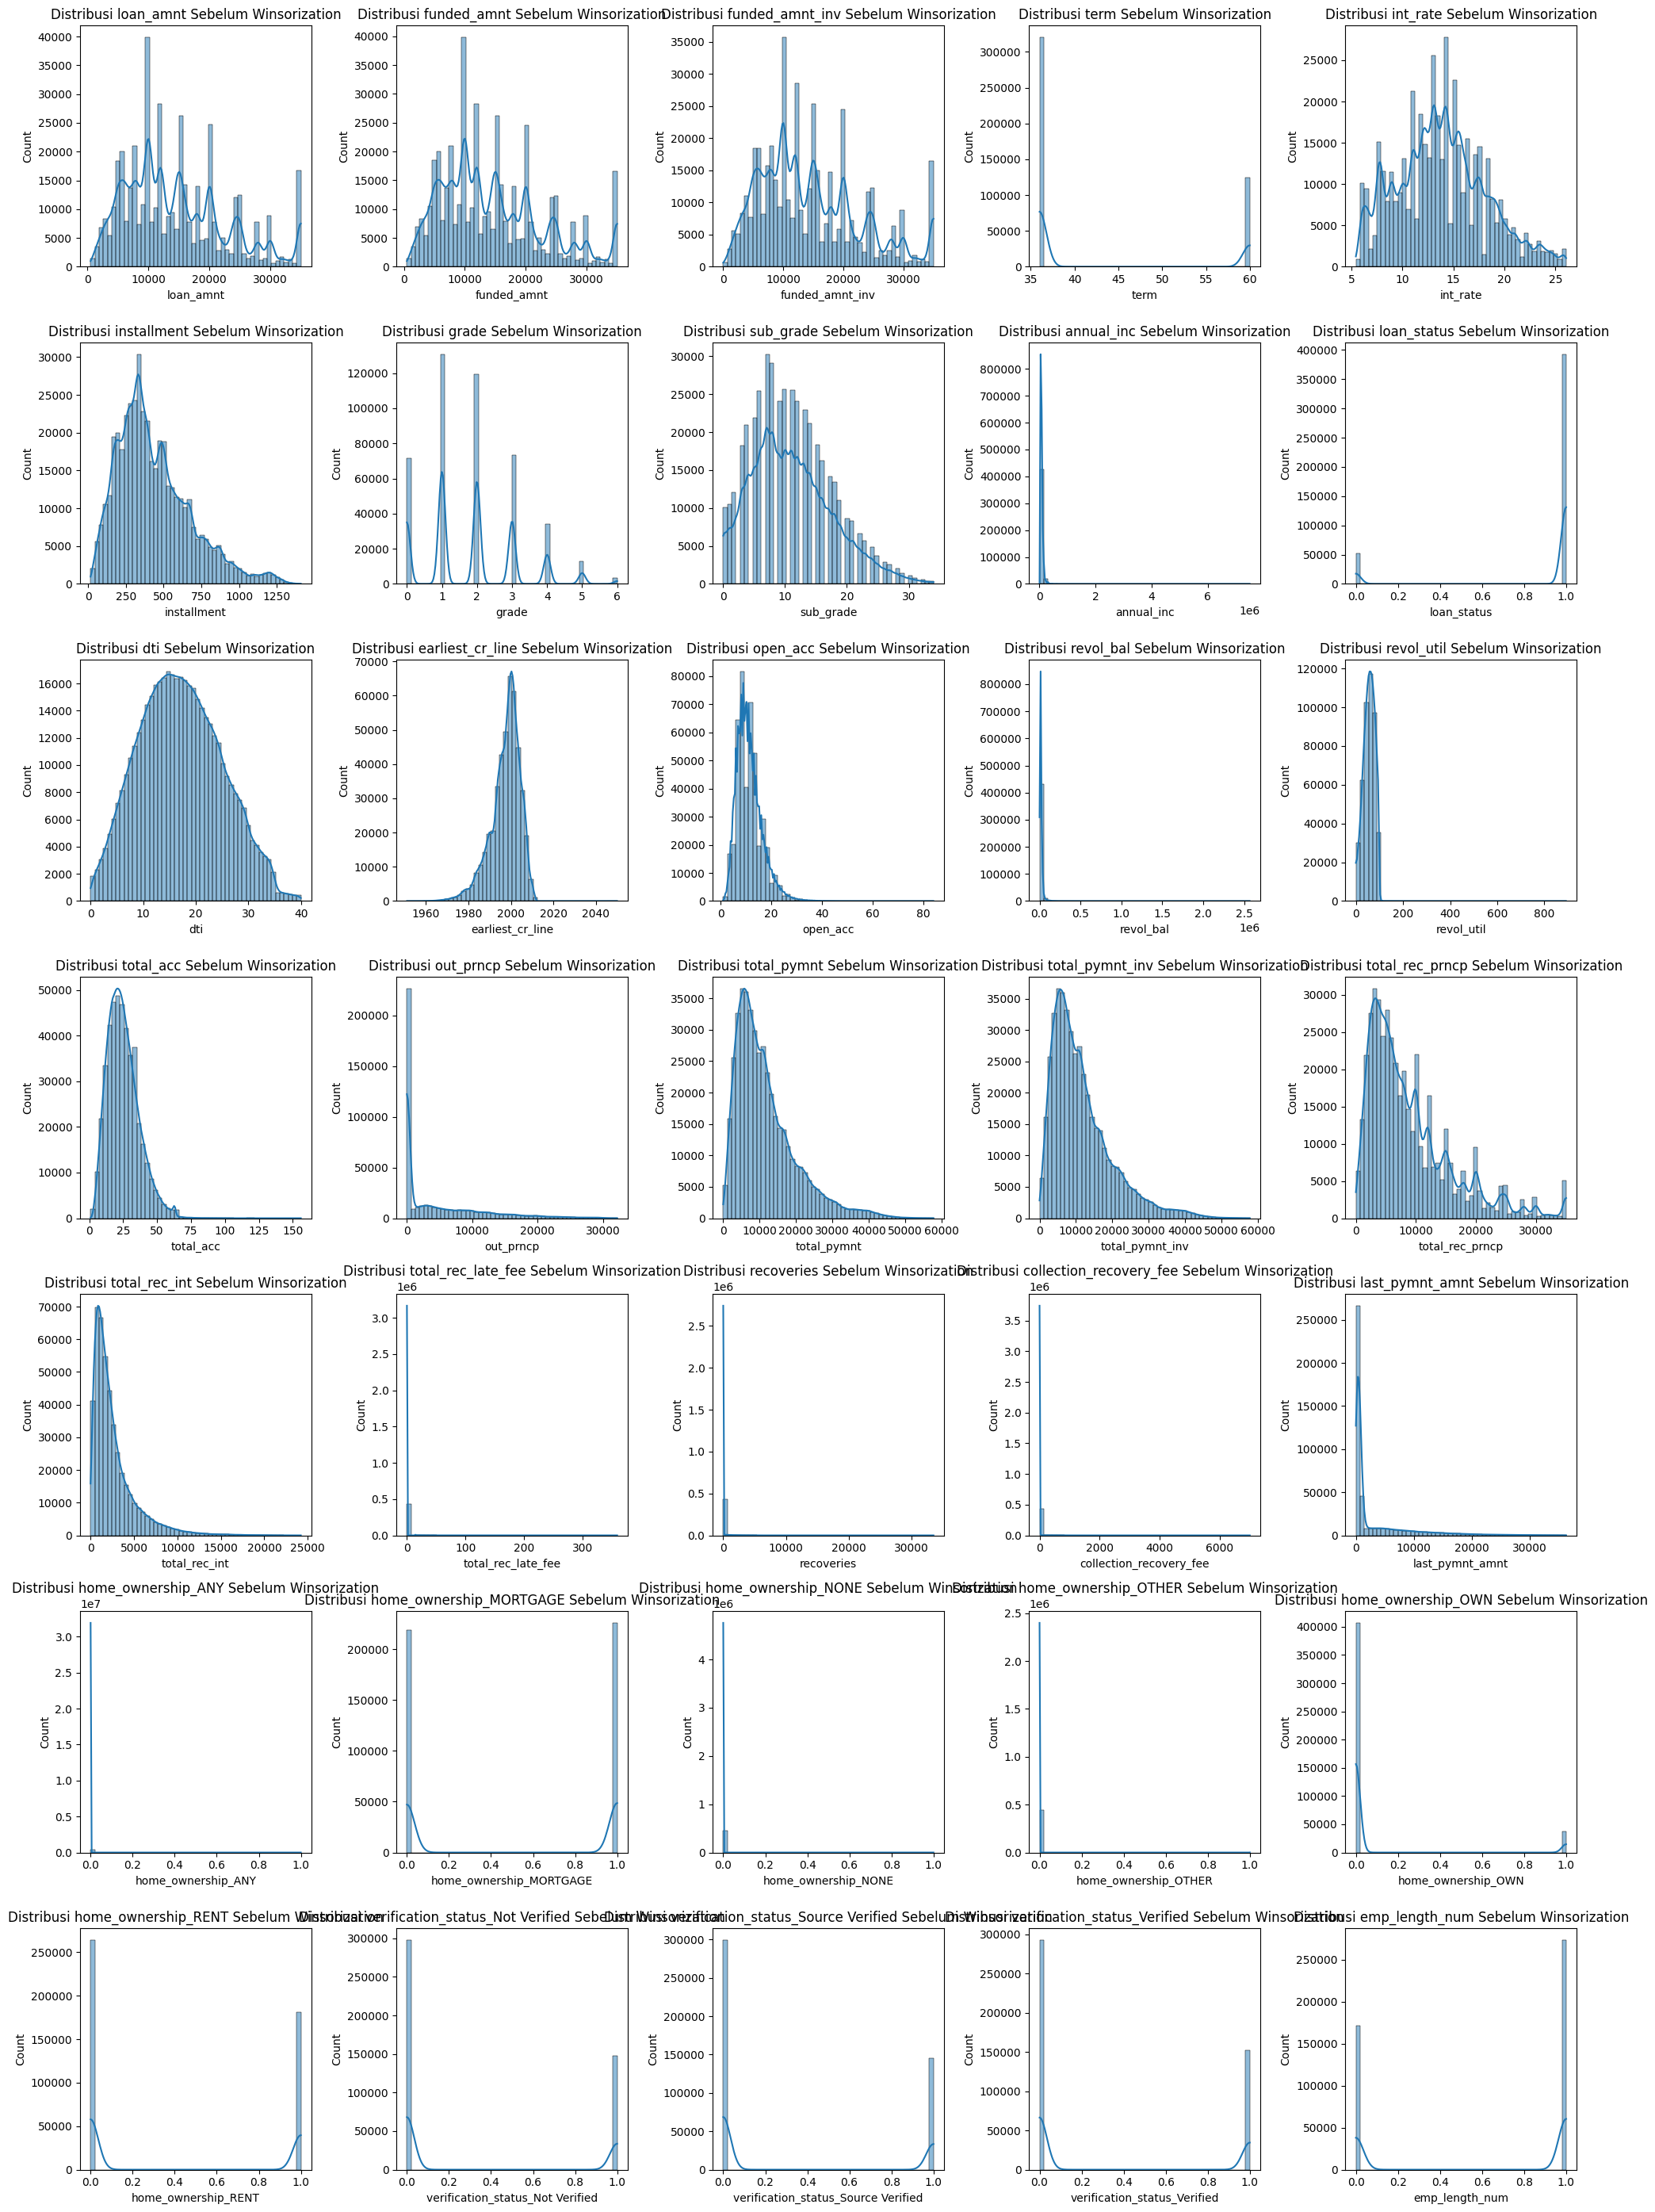

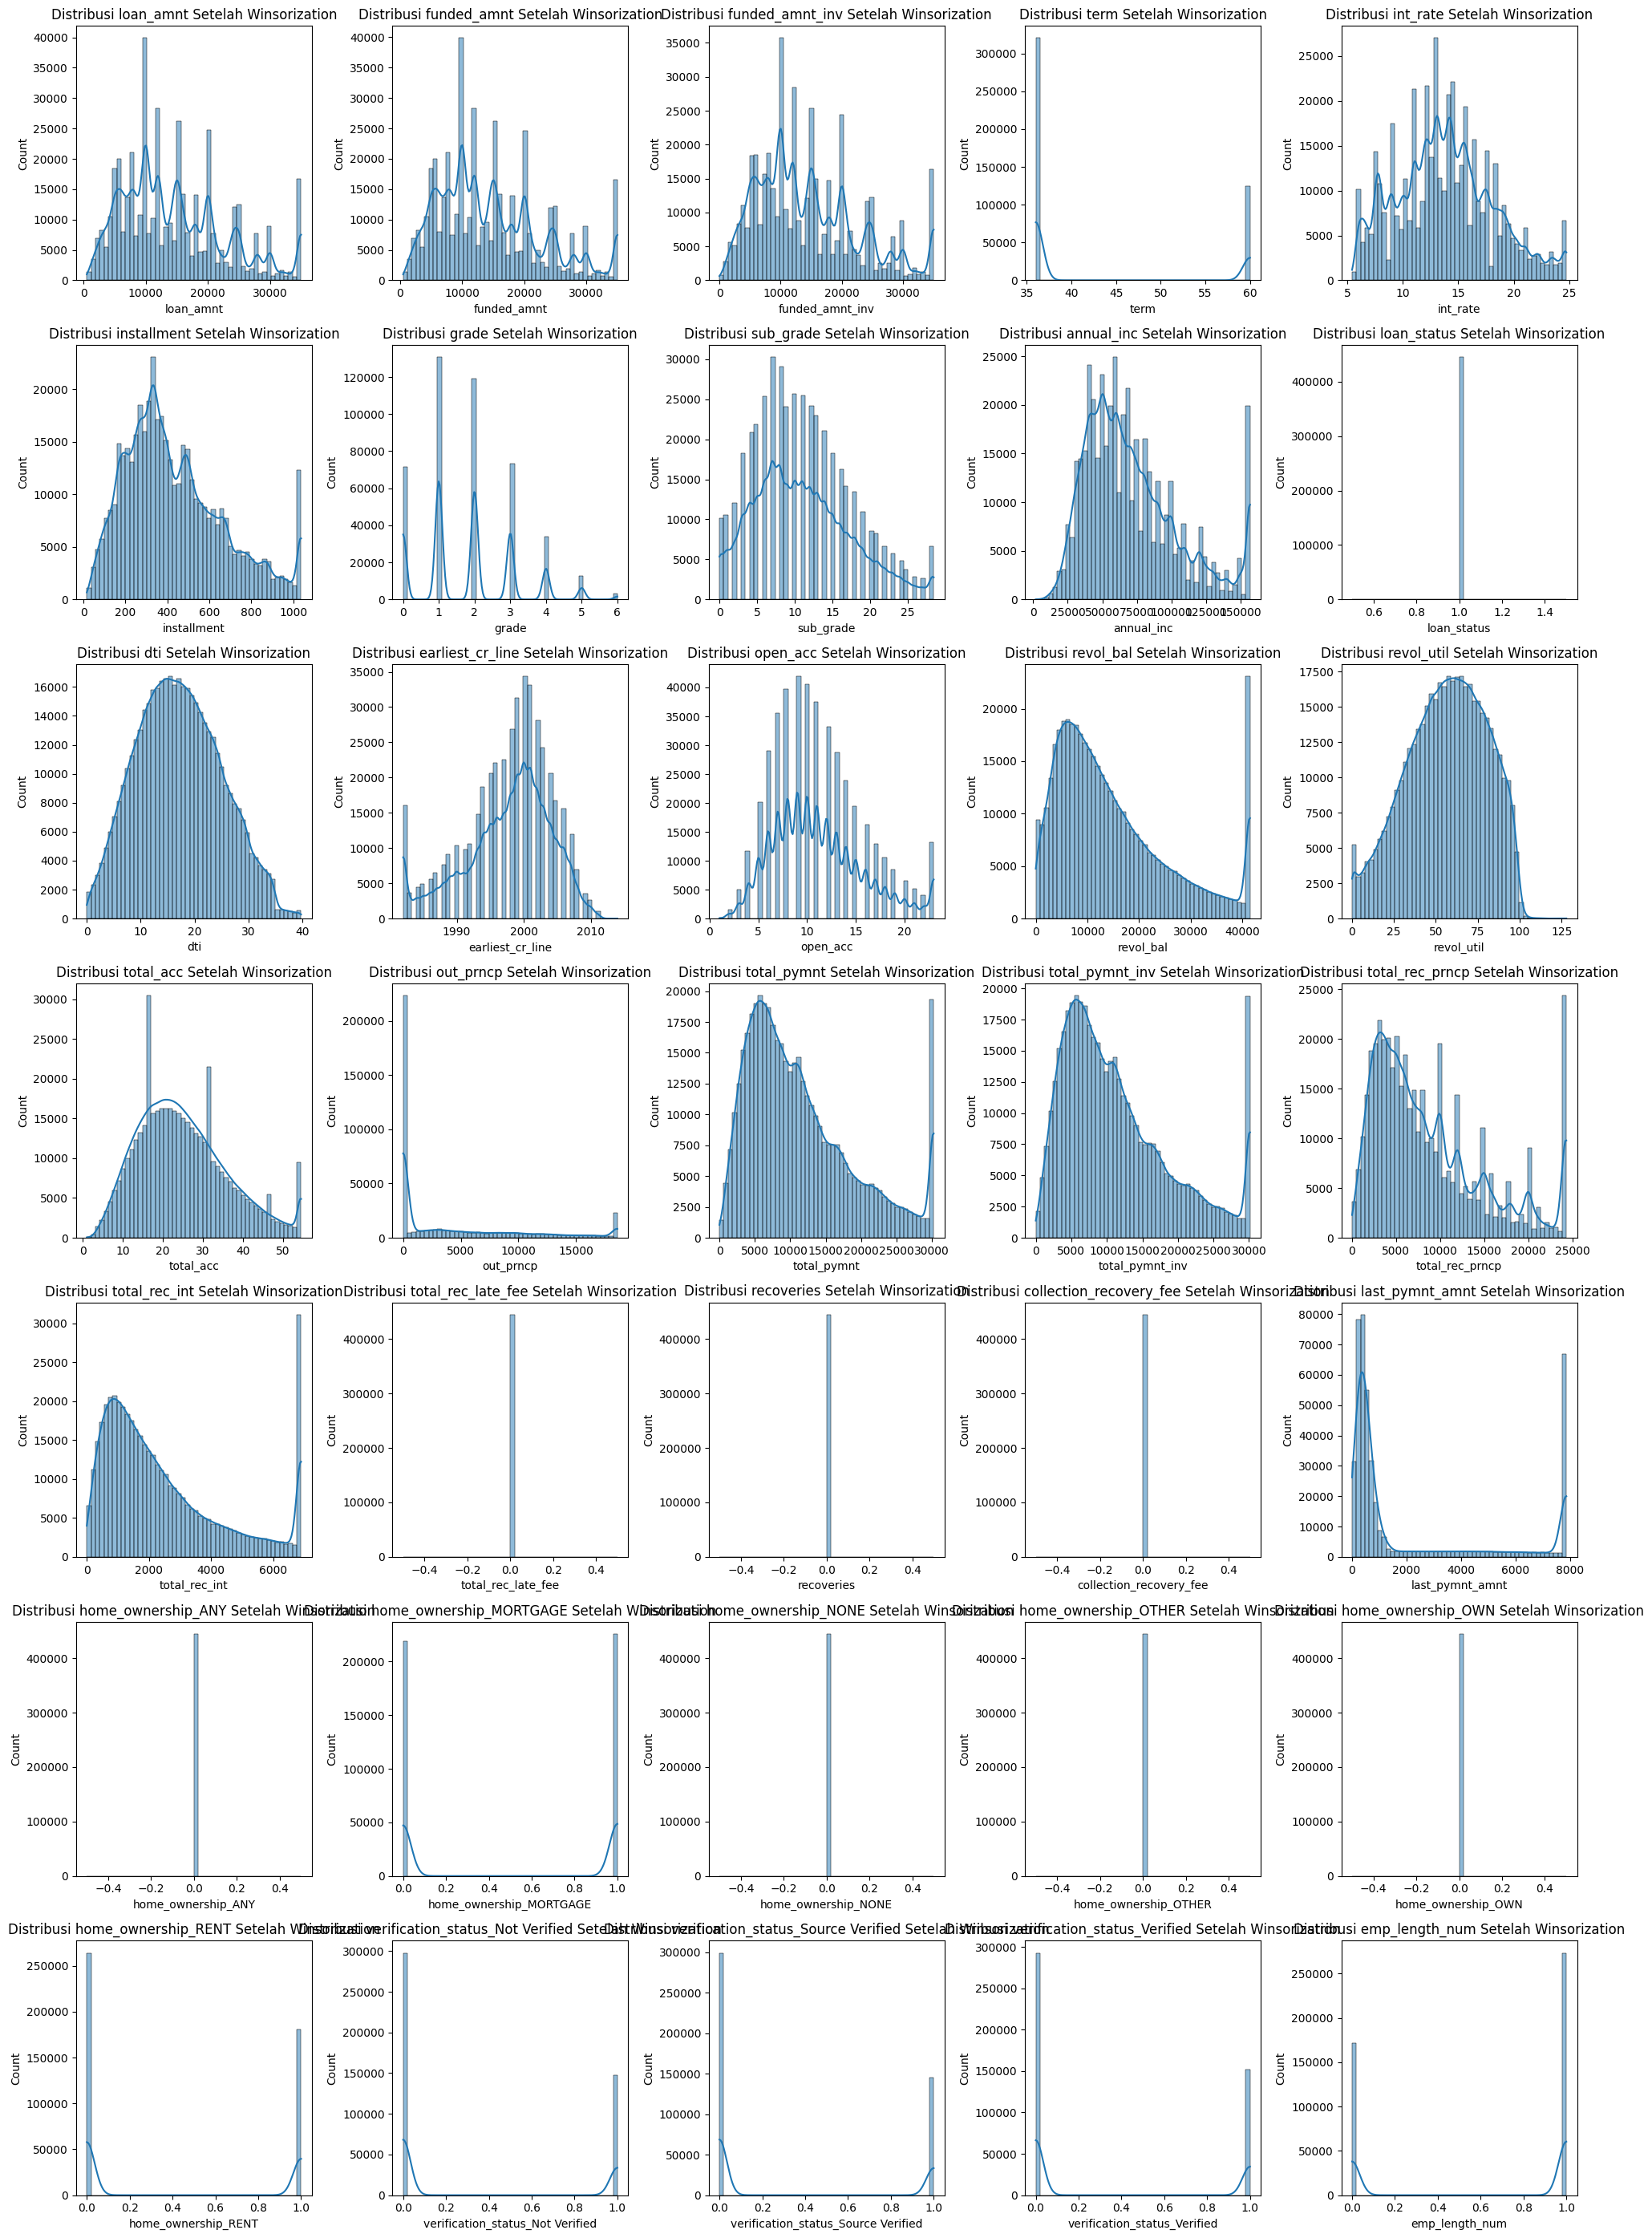

In [ ]:
# Mendapatkan daftar kolom numerik
numeric_columns = df2.select_dtypes(include=[np.number]).columns.tolist()

# Menerapkan Winsorization pada semua kolom numerik
df2_winsorized = df2.copy()  # Membuat salinan DataFrame untuk winsorization
for column in numeric_columns:
    df2_winsorized = winsorize(df2_winsorized, column)

# Memvisualisasikan data sebelum dan sesudah winsorization
plot_histograms_before_after(df2, numeric_columns, df2_winsorized, numeric_columns)

In [ ]:
target_column = 'loan_status'  # Ganti dengan nama kolom target Anda

# Menghitung korelasi antara fitur dan target
correlation = df2.corr()[target_column].sort_values(ascending=False)
print(correlation)

loan_status                            1.000000
total_rec_prncp                        0.254325
total_pymnt_inv                        0.191058
total_pymnt                            0.190567
last_pymnt_amnt                        0.176223
out_prncp                              0.128046
annual_inc                             0.046827
home_ownership_MORTGAGE                0.042871
verification_status_Not Verified       0.037626
total_acc                              0.019721
revol_bal                              0.017965
emp_length_num                         0.009646
total_rec_int                          0.008555
verification_status_Source Verified    0.006562
open_acc                               0.000816
home_ownership_ANY                     0.000547
home_ownership_OWN                    -0.000197
home_ownership_NONE                   -0.001186
home_ownership_OTHER                  -0.006014
funded_amnt_inv                       -0.016204
funded_amnt                           -0

In [ ]:
# Membuat DataFrame untuk memvisualisasikan korelasi
correlation_df = pd.DataFrame(correlation).reset_index()
correlation_df.columns = ['Feature', 'Correlation with ' + target_column]
print(correlation_df)

                                Feature  Correlation with loan_status
0                           loan_status                      1.000000
1                       total_rec_prncp                      0.254325
2                       total_pymnt_inv                      0.191058
3                           total_pymnt                      0.190567
4                       last_pymnt_amnt                      0.176223
5                             out_prncp                      0.128046
6                            annual_inc                      0.046827
7               home_ownership_MORTGAGE                      0.042871
8      verification_status_Not Verified                      0.037626
9                             total_acc                      0.019721
10                            revol_bal                      0.017965
11                       emp_length_num                      0.009646
12                        total_rec_int                      0.008555
13  verification_sta

In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df2.drop('loan_status', axis=1)  # Fitur
y = df2['loan_status']               # Target

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE pada data latih
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Periksa ukuran dataset sebelum dan sesudah SMOTE
print(f'Jumlah sampel sebelum SMOTE: {X_train.shape[0]}')
print(f'Jumlah sampel setelah SMOTE: {X_train_smote.shape[0]}')
print(f'Jumlah kelas sebelum SMOTE:\n{y_train.value_counts()}')
print(f'Jumlah kelas setelah SMOTE:\n{y_train_smote.value_counts()}')


Jumlah sampel sebelum SMOTE: 311464
Jumlah sampel setelah SMOTE: 549682
Jumlah kelas sebelum SMOTE:
loan_status
1    274841
0     36623
Name: count, dtype: int64
Jumlah kelas setelah SMOTE:
loan_status
1    274841
0    274841
Name: count, dtype: int64


<ipython-input-160-333b5d1ff1a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


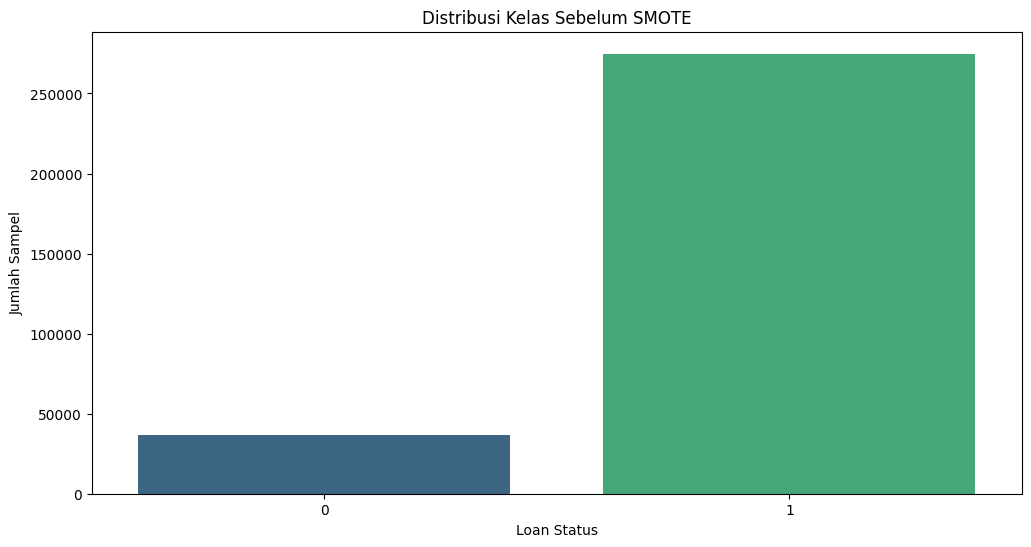

<ipython-input-160-333b5d1ff1a4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, palette='viridis')


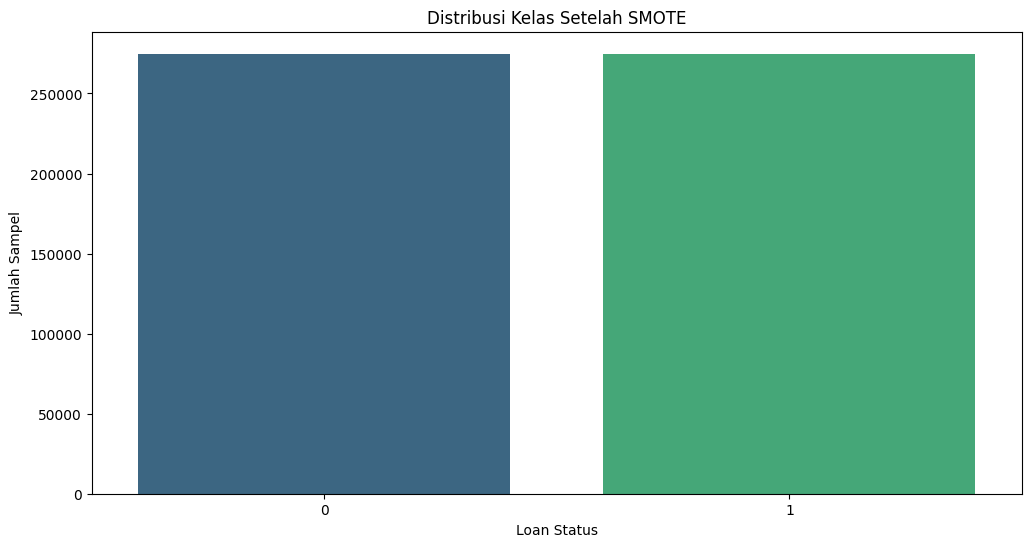

In [ ]:
# Plot distribusi kelas sebelum SMOTE
plt.figure(figsize=(12, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xlabel('Loan Status')
plt.ylabel('Jumlah Sampel')
plt.show()

# Plot distribusi kelas setelah SMOTE
plt.figure(figsize=(12, 6))
sns.countplot(x=y_train_smote, palette='viridis')
plt.title('Distribusi Kelas Setelah SMOTE')
plt.xlabel('Loan Status')
plt.ylabel('Jumlah Sampel')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Misalkan df2 adalah DataFrame yang sudah diproses
# Pisahkan fitur dan target
X = df2.drop(columns=['loan_status'])  # Sesuaikan nama target Anda
y = df2['loan_status']  # Nama target Anda

# Pisahkan data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Pilih fitur numerik
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit dan transform data pelatihan
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

# Transform data uji (menggunakan scaler yang sama)
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Tampilkan beberapa baris dari data yang telah dinormalisasi
print(X_train.head())
print(X_test.head())


        loan_amnt  funded_amnt  funded_amnt_inv      term  int_rate  \
261371  -1.440811    -1.439724        -1.426453 -0.624236 -0.545471   
368749  -0.295360    -0.292659        -0.282962 -0.624236 -1.785529   
318305  -0.295360    -0.292659        -0.282962 -0.624236 -1.244580   
428151  -0.777655    -0.775634        -0.764432 -0.624236  0.188020   
403701  -1.139377    -1.137865        -1.125535 -0.624236 -0.190186   

        installment     grade  sub_grade  annual_inc       dti  ...  \
261371    -1.449275 -0.616209  -0.467261    1.977158 -0.888331  ...   
368749    -0.287972 -1.372612  -1.690662    1.977158  0.132326  ...   
318305    -0.234722 -1.372612  -1.078961   -0.869548 -0.061842  ...   
428151    -0.654641  0.140195   0.144440   -0.103883  0.788918  ...   
403701    -1.095867 -0.616209  -0.314336   -0.696292 -1.382692  ...   

        home_ownership_ANY  home_ownership_MORTGAGE  home_ownership_NONE  \
261371           -0.001792                -1.015714            -0.0104

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Inisialisasi model
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=2),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0),
    'Gaussian Naive Bayes': GaussianNB()
}

# Melatih dan mengevaluasi setiap model
for name, model in models.items():
    print(f"Training and evaluating {name}...")

    # Latih model
    model.fit(X_train, y_train)

    # Prediksi pada data uji
    y_pred = model.predict(X_test)

    # Evaluasi model
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    print(f"{name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*50 + "\n")


Training and evaluating Decision Tree...

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     15695
           1       0.98      0.97      0.97    117790

    accuracy                           0.95    133485
   macro avg       0.89      0.90      0.89    133485
weighted avg       0.96      0.95      0.96    133485

Decision Tree Confusion Matrix:
[[ 12906   2789]
 [  3227 114563]]


Training and evaluating Random Forest...


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matriks kebingungan untuk Random Forest
rfc_cm = confusion_matrix(y_test, rfc_predictions)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(rfc_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - Random Forest')

# Matriks kebingungan untuk Logistic Regression
lr_cm = confusion_matrix(y_test, lr_predictions)
plt.subplot(1, 2, 2)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - Logistic Regression')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# Inisialisasi model
rfc = RandomForestClassifier(random_state=2)
lr = LogisticRegression(max_iter=1000, random_state=42)

# K-Fold Cross Validation
k = 5  # Jumlah fold yang diinginkan

# Random Forest
rfc_cv_scores = cross_val_score(rfc, X_train_scaled, y_train, cv=k, scoring='accuracy')
print(f"Random Forest Cross-Validation Scores: {rfc_cv_scores}")
print(f"Random Forest Mean Accuracy: {np.mean(rfc_cv_scores)}")

# Logistic Regression
lr_cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=k, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Scores: {lr_cv_scores}")
print(f"Logistic Regression Mean Accuracy: {np.mean(lr_cv_scores)}")